# Data Analysis on Rio de Janeiro Airbnb dataset.

## Import the essential packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the CSV. Downloaded from http://insideairbnb.com/get-the-data.html

In [2]:
# Read the CSV using pandas and use head to take a look at the data.
df = pd.read_csv('listings.csv')
df.head()

id                         listing_url       scrape_id last_scraped  \
0  17878  https://www.airbnb.com/rooms/17878  20210717121617   2021-07-17   
1  24480  https://www.airbnb.com/rooms/24480  20210717121617   2021-07-17   
2  25026  https://www.airbnb.com/rooms/25026  20210717121617   2021-07-17   
3  35636  https://www.airbnb.com/rooms/35636  20210717121617   2021-07-18   
4  35764  https://www.airbnb.com/rooms/35764  20210717121617   2021-07-17   

                                                name  \
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1                   Nice and cozy near Ipanema Beach   
2          Beautiful Modern Decorated Studio in Copa   
3                   Cosy flat close to Ipanema beach   
4     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description  \
0  Discounts for long term stays. <br />- Large b...   
1  My studio is located in the best  of Ipanema. ...   
2  Our apartment is a little gem, everyone loves ...   
3  This cosy apartment  is just a few steps away ...   
4  Our newly renovated studio is located in the b...   

                               neighborhood_overview  \
0  This is the one of the bests spots in Rio. Bec...   
1  The beach, the lagoon, Ipanema is a great loca...   
2  Copacabana is a lively neighborhood and the ap...   
3  The  apartment street is very quiet and safe ....   
4  Our guests will experience living with a local...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/65320518/3069...    68997   
1  https://a0.muscache.com/pictures/11955612/b28e...    99249   
2  https://a0.muscache.com/pictures/3003965/68ebb...   102840   
3  https://a0.muscache.com/pictures/20009355/38b6...   153232   
4  https://a0.muscache.com/pictures/23782972/1d3e...   153691   

                                   host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/68997  ...                        4.90   
1   https://www.airbnb.com/users/show/99249  ...                        4.90   
2  https://www.airbnb.com/users/show/102840  ...                        4.90   
3  https://www.airbnb.com/users/show/153232  ...                        4.88   
4  https://www.airbnb.com/users/show/153691  ...                        4.94   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.76                4.65     NaN                t   
1                   4.97                4.58     NaN                f   
2                   4.81                4.56     NaN                f   
3                   4.90                4.65     NaN                f   
4                   4.93                4.87     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              2                                           2   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.11  
1                                           0              0.88  
2                                           0              1.89  
3                                           0              1.97  
4                                           0              3.05  

[5 rows x 74 columns]

In [3]:
# Describe the data to get the information on how the numerical columns are distributed.
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  2.363500e+04  2.363500e+04  2.363500e+04         23628.000000   
mean   2.583630e+07  2.021072e+13  1.017046e+08             8.689521   
std    1.620414e+07  0.000000e+00  1.110507e+08            31.028486   
min    1.787800e+04  2.021072e+13  3.607000e+03             0.000000   
25%    1.230374e+07  2.021072e+13  1.407128e+07             1.000000   
50%    2.494374e+07  2.021072e+13  6.029813e+07             2.000000   
75%    4.139697e+07  2.021072e+13  1.562663e+08             4.000000   
max    5.109122e+07  2.021072e+13  4.131633e+08           433.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               23628.000000                           0.0  23635.000000   
mean                    8.689521                           NaN    -22.966148   
std                    31.028486                           NaN      0.035113   
min                     0.000000                           NaN    -23.072620   
25%                     1.000000                           NaN    -22.984680   
50%                     2.000000                           NaN    -22.972000   
75%                     4.000000                           NaN    -22.951960   
max                   433.000000                           NaN    -22.749690   

          longitude  accommodates  bathrooms  ...  review_scores_checkin  \
count  23635.000000  23635.000000        0.0  ...           14501.000000   
mean     -43.249278      4.139454        NaN  ...               4.872734   
std        0.097131      2.493865        NaN  ...               0.389450   
min      -43.720990      0.000000        NaN  ...               0.000000   
25%      -43.306905      2.000000        NaN  ...               4.900000   
50%      -43.196360      4.000000        NaN  ...               5.000000   
75%      -43.186300      5.000000        NaN  ...               5.000000   
max      -43.104400     16.000000        NaN  ...               5.000000   

       review_scores_communication  review_scores_location  \
count                 14503.000000            14500.000000   
mean                      4.851966                4.847638   
std                       0.415206                0.377966   
min                       1.000000                1.000000   
25%                       4.880000                4.850000   
50%                       5.000000                5.000000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  license  calculated_host_listings_count  \
count         14501.000000      0.0                    23635.000000   
mean              4.630632      NaN                        7.396361   
std               0.510273      NaN                       22.759622   
min               1.000000      NaN                        1.000000   
25%               4.500000      NaN                        1.000000   
50%               4.750000      NaN                        1.000000   
75%               5.000000      NaN                        3.000000   
max               5.000000      NaN                      195.000000   

       calculated_host_listings_count_entire_homes  \
count                                 23635.000000   
mean                                      6.492575   
std                                      22.147644   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     191.000000   

       calculated_host_listings_count_private_rooms  \
count                                  23635.000000   
mean                                       0.796446   
std                                        1.683511   
min                                        0.000000   
2

In [4]:
# Taking a look at which columns are available for analysis.
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# First question: Does the GeoLocation of a property affect its price?

Create a function responsible to conver the price to float

In [5]:
def convert_price_to_float(price):
    """
    Function responsible to convert a series of data from price to float.
    The function converts the data from string removing the symbols $ and ,
    to float.

    Arguments:
    price -- Series containing the information in price. Example: $2,000.00
    
    Return -- The information in float format without format symbols.
    """
    price_in_float = price.str.replace(',', '')
    price_in_float = price_in_float.str.replace('$', '')
    price_in_float = price_in_float.astype(float)
    return price_in_float

In [6]:
# Get the latitude, longitude and price
df_geo = df[['latitude', 'longitude', 'price']]

# Drop the NA values because we just need to evaluate the real properties that have the three information
df_geo.dropna()

# Convert the prices to float to improve the analysis
df_geo['price'] = convert_price_to_float(df_geo['price'])
df_geo.describe()

/var/folders/pt/zrk7x6q129l0kc42bc7l9fhw0000gn/T/ipykernel_1055/2041036851.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_in_float = price_in_float.str.replace('$', '')
/var/folders/pt/zrk7x6q129l0kc42bc7l9fhw0000gn/T/ipykernel_1055/1746010296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['price'] = convert_price_to_float(df_geo['price'])


latitude     longitude          price
count  23635.000000  23635.000000   23635.000000
mean     -22.966148    -43.249278     751.329300
std        0.035113      0.097131    5477.207312
min      -23.072620    -43.720990       0.000000
25%      -22.984680    -43.306905     150.000000
50%      -22.972000    -43.196360     256.000000
75%      -22.951960    -43.186300     511.000000
max      -22.749690    -43.104400  586229.000000

As we can see, the max price is way bigger than the quarter values.

It seems to be some spurious values. So let's keep the values between 1 and 5,000

In [7]:
df_geo = df_geo[df_geo['price'].between(1, 5000)]

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

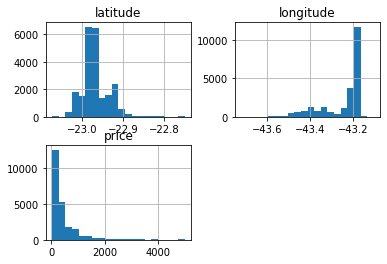

In [8]:
# Analyzing the histograms
df_geo.hist(bins=20)

In [9]:
# Getting the correlation of latitude, longitude and price
df_geo.corr()

latitude  longitude     price
latitude   1.000000   0.343188 -0.162098
longitude  0.343188   1.000000 -0.127245
price     -0.162098  -0.127245  1.000000

As we can see, the correlation of latitude or longitude with the price **are not correlated**.

In order to identify if the geo-location is important, we can plot the values in a x,y chart and verify what is going on.

The graph below shows the prices with different colors to identify if some regions are cheaper than others.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

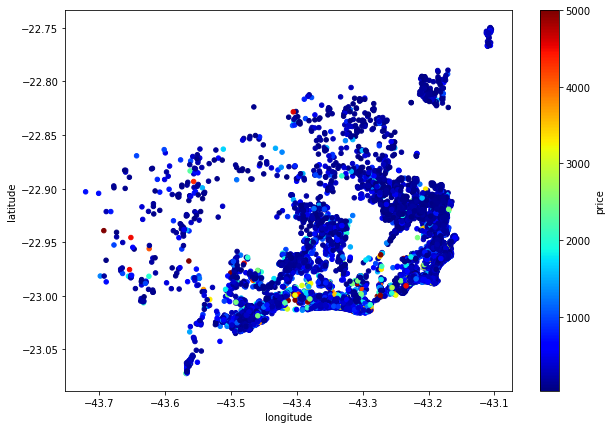

In [13]:
# Visualizing the price in 2D graph:
df_geo.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
            c="price", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)

## Improving the visualization with a real map

To analyze the map in a better way, I chose to download a map from Rio using the coordinates of all the points.

After downloading the map from OpenStreetMap, I just plotted the same graph than the previous cell and added the map as a background:

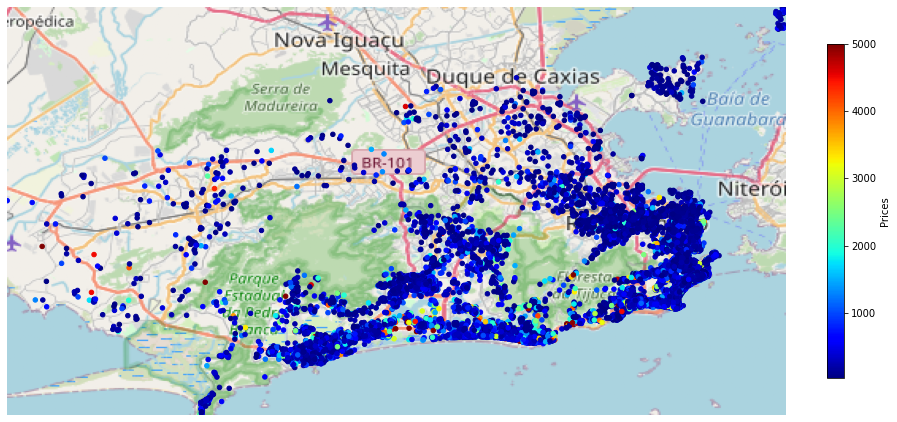

In [12]:
from matplotlib.pyplot import figure

# Getting the minimum and maximum to download the map used to plot the data
bounding_box = ((df_geo.longitude.min(), df_geo.longitude.max(),      
                 df_geo.latitude.min(), df_geo.latitude.max()))

# Reading the map exported in the OpenStreetmap website: https://www.openstreetmap.org/export#map=11/-22.9116/-43.4983
map = plt.imread('map.png')

# Plotting the graph with the background map.
plt.figure(figsize=(15, 15))
im = plt.scatter(df_geo.longitude, df_geo.latitude, c=df_geo.price, s=20, cmap='jet')
plt.axis('off')
cbar = plt.colorbar(im,fraction=0.02)
cbar.set_label('Prices')
plt.imshow(map, zorder=0, extent = bounding_box, aspect= 'equal')

## Question 2: Which amenities are more common in Rio

## First thing to do: break amenities column into different columns.

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

def create_multi_column(single_column):
    """"
    Function responsible for converting a data series that contains multiple items separated by ',' .
    The return of the function will be a dataframe containing one column by distinct item found in the input data series
    with 0 or 1 to indicate the presence of that item.

    Example, two rows with the following data:
         
                        column
    1      item1, item2, item3
    2             item2, item4

    Will be converted to a dataframe with 4 columns:

          item1    item2    item3    item4
    1         1        1        1        0
    2         0        1        0        1

    Input
    single_column -- Data series containing a single column with items separated by ','.

    Returns:
    A DataFrame containing one column by distinct values found in the input data series.
    """
    multi_col = single_column.map(lambda item: [list.replace('"', '').replace('/', '').replace('{', '').replace('}', '') for list in item.split(',')])
    multi_label = MultiLabelBinarizer()
    multi_col_df = pd.DataFrame(multi_label.fit_transform(multi_col), columns=multi_label.classes_, index=multi_col.index)
    return multi_col_df

Using the defined function to convert a column that has multiple values separated
by comma into a dataframe containing multiple columns.

This is necessary to analyze each amenity independetely.

In [15]:
amenities_multi = create_multi_column(df['amenities'])

To analyze the most popular amenities, a graph is being plotted with the top 10 amenities that are more common in the dataset.

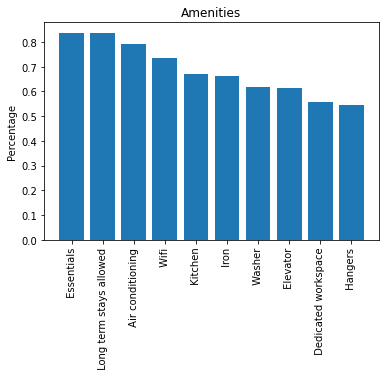

In [17]:
most_common = amenities_multi.sum().sort_values(ascending = False)[:10] / (amenities_multi.count()[0])
plt.bar(most_common.index, most_common.values)
plt.title('Amenities')
plt.ylabel('Percentage')
plt.xticks(rotation = 90);

As it seems that some of the popular amenities like TV or Fridge are not listed, let's take a look at the columns that were generated to see if there is ambiguous values.

In [14]:
list(amenities_multi.columns)

['  Amenities Realgem\\u2019s -Talentos do Brasil Feita a base de mel',
 '  Electrolux refrigerator',
 '  Electrolux stainless steel gas stove',
 '  Electrolux stainless steel oven',
 '  c Congelador Separado refrigerator',
 '  linens',
 ' 02 Bocas electric stove',
 ' 02 bocas cforno gas stove',
 ' 04 bocas cforno gas stove',
 ' 1 boca Fischer induction stove',
 ' 14\\ TV with standard cable',
 ' 17\\ TV with standard cable',
 ' 17\\ TV]',
 ' 19\\ HDTV with standard cable',
 ' 2 Burner Hot plate electric stove',
 ' 2 bocas electric stove',
 ' 2 caixas de 45w cada',
 ' 2 caixas sony Bluetooth sound system',
 ' 2 in 1. sound system with aux',
 ' 2-5 years old',
 ' 20\\ HDTV with premium cable',
 ' 20\\ TV with standard cable',
 ' 21\\ HDTV with standard cable',
 ' 21\\ TV',
 ' 21\\ TV with standard cable',
 ' 22\\ HDTV with Netflix',
 ' 24\\ HDTV with Netflix',
 ' 24\\ HDTV with standard cable',
 ' 24\\ TV',
 ' 25\\ TV with Chromecast',
 ' 26\\ HDTV with Netflix',
 ' 27\\ HDTV with stand

# Question 3: Estimate price of a new offer

To estimate the price of a new offer, a simple model with just some of the columns were proposed

Creating a new df with just the information that will be used in our model and verifying the types of the data in this subset

In [18]:
df_model = df[[
       'neighbourhood_cleansed', 'latitude', 
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price']]

df_model.dtypes

neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                      object
dtype: object

First thing to do is to verify if there is Nan values in the dataset and the percentage of them in each column

In [19]:
# Verify which data has Nan Values and how much of it are Nan
df_model.isnull().sum() / df_model.shape[0]

neighbourhood_cleansed    0.000000
latitude                  0.000000
longitude                 0.000000
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
bathrooms                 1.000000
bedrooms                  0.066892
beds                      0.009647
price                     0.000000
dtype: float64

As the bathrooms column is always null, I chose to remove it.

In [59]:
df_model.drop(['bathrooms'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


As 1 bedroom and 1 bed should be the minimum for representing a room in Airbnb, I chose to replace nan by 1:


In [20]:
df_model['bedrooms'].fillna(1, inplace=True)
df_model['beds'].fillna(1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In order to convert the categorical data into factors, I've used the factorize function from pandas

In [22]:
def convert_categorical(df, cols):
    """
    Function responsible for converting the categorical column to factors.

    Input:
    df -- DataFrame containing the column that will be converted
    cols -- List of columns that should be converted from categorical to factors

    Return:
    The function performs the operation in place, so there is no return.
    """
    for col in cols:    
        df[col] = df[col].factorize()[0]


convert_categorical(df_model, ['neighbourhood_cleansed', 'property_type', 'room_type'])

/var/folders/pt/zrk7x6q129l0kc42bc7l9fhw0000gn/T/ipykernel_1055/3572524908.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].factorize()[0]


Conver the price of this new dataframe to float, so it's possible to use it in a prediction model.

In [23]:
df_model['price'] = convert_price_to_float(df_model['price'])

/var/folders/pt/zrk7x6q129l0kc42bc7l9fhw0000gn/T/ipykernel_1055/2041036851.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_in_float = price_in_float.str.replace('$', '')
/var/folders/pt/zrk7x6q129l0kc42bc7l9fhw0000gn/T/ipykernel_1055/4292886009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['price'] = convert_price_to_float(df_model['price'])


As there is no free rooms, I opted to remove the rooms with 0 on price, leaving just the real rooms in our dataset:

In [24]:
# Remove rooms with 0 on price.
df_model = df_model[df_model.price != 0]

In [25]:
# Verifying values and ranges
df_model.describe()

neighbourhood_cleansed      latitude     longitude  property_type  \
count            23628.000000  23628.000000  23628.000000   23628.000000   
mean                12.289572    -22.966150    -43.249287       4.046724   
std                 20.896943      0.035113      0.097134       8.676214   
min                  0.000000    -23.072620    -43.720990       0.000000   
25%                  0.000000    -22.984680    -43.306940       1.000000   
50%                  4.000000    -22.972000    -43.196370       1.000000   
75%                 13.000000    -22.951970    -43.186300       3.000000   
max                152.000000    -22.749690    -43.104400      86.000000   

          room_type  accommodates  bathrooms      bedrooms          beds  \
count  23628.000000  23628.000000        0.0  23628.000000  23628.000000   
mean       0.302776      4.140681        NaN      1.662900      2.543465   
std        0.526519      2.493216        NaN      1.061291      2.283689   
min        0.000000      1.000000        NaN      1.000000      0.000000   
25%        0.000000      2.000000        NaN      1.000000      1.000000   
50%        0.000000      4.000000        NaN      1.000000      2.000000   
75%        1.000000      5.000000        NaN      2.000000      3.000000   
max        3.000000     16.000000        NaN     30.000000     91.000000   

               price  
count   23628.000000  
mean      751.551888  
std      5478.003352  
min        33.000000  
25%       150.000000  
50%       256.000000  
75%       511.000000  
max    586229.000000

## Creation of the model and training of it


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df_model[['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
            'room_type', 'accommodates', 'bedrooms', 'beds']]
y = df_model[['price']]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=14) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test)

mean_error = mean_absolute_error(y_test, y_test_preds)
mean_error

666.9192270895346

As we can see in the result above, the mean absolute error is higher than expected (More than R$600), which shows that using just these columns and a Linear Regression cannot estimate the prices of the real ones.